# Exploratory Data Analysis

### What makes data “good”?

What makes a good data set?

-   **Size**: the more *samples* are in the data set, the more examples
    your machine learning model will be able to learn from, and the
    better it will do. Often, a simple machine learning model trained on
    a large data set will outperform a “fancy” model on a small data
    set. Sample size is also crucial in statistical inference because it directly impacts the reliability and precision of your conclusions
-   **Quality**: Are no
    values (or very few values) missing, noisy, or incorrect? In a machine learning context, are there *predictive* features in the data?
    Is the
    scenario in which the data collected similar to the scenario in
    which your model will be used? These are examples of questions that
    we might ask to evaluate the quality of a data set.

### Purpose of exploratory data analysis

Once we have identified one or more candidate data sets for a particular
problem, we perform some *exploratory data analysis*. This process helps
us

-   detect and possibly correct mistakes in the data
-   check our assumptions about the data
-   identify potential relationships between features
-   assess the direction and rough size of relationships between
    features and the target variable 


“Recipe” for exploratory data analysis
--------------------------------------

We will practice using a basic “recipe” for exploratory data analysis.

1.  Set down *expectations* about the data
2.  Load data and check that it is loaded correctly
3.  Inspect the data to make sure it is consistent with your
    expectations (“sanity checks”), and clean or filter the data if
    needed
4.  Compute descriptive statistics and explore relationships in the data 

Every exploratory data analysis is different, as specific
characteristics of the data may lead you to explore different things in
depth. However, this “recipe” can be a helpful starting point.

### Set down *expectations* about the data

The first step is to codify your expectations about the data *before*
you look at it:

-   Read the data documentation
-   How many rows and columns are in the data?
-   What does each variable mean? What units are data recorded in? What
    is the expected range or typical value for each column? What about variability?
-   How was data collected? Identify sampling issues etc.

### Example: Flanker reaction time data set
--------------------------------------------

We will practice applying the “recipe” for exploratory data analysis to this data.

We will use the pandas library in Python, which includes many powerful utilities for managing data. 

This is real data from a flanker experiment. In this experiment, participants had to press either the left or right arrow key, to indicate whether an arrow shown on the screen is pointing left or right, respectively. However, the catch is that the centre arrow is "flanked" by two other arrows on each side; these can be pointing the same way as the target arrow (congruent).

![flanker_congruent](images/flanker_congruent@0.75x.png)

or in the opposite direction (incongruent)

![flanker_incongruent](images/flanker_incongruent@0.75x.png)

We expect that the incongruent condition would be associated with slower RTs, because the flanking arrows create some visual confusion and response competition (cognitive interference). In order to confirm this hypothesis, we would want to get an estimate of the RT for each condition, from a representative sample of human participants. We need a number of participants because we know that there is variability in the average RT from person to person (**between-subject** variability). Here we have 27 participants.

To estimate the average RT for each condition for an individual, we would want to present many trials of each condition, in random order. We do this because there is always some trial-to-trial variability in measuring human RTs (**within-subject** variability). In this study each participant completed 40 trials in each condition. Thus we have repeated measures of RT for each participant, in each experimental condition. 

This experiment also had a third condition, *neutral*. On neutral trials, only the centre arrow was presented, without flankers. This condition was included to control for the fact that 5 arrows all pointing in the same direction might facilitate (speed up) responses relative to a single arrow — there might be additive, beneficial effects of congruent flankers. Comparing both the congruent and incongruent conditions to the neutral condition allows us to estimate the relative cost or benefit of flankers that are incongruent or congruent with the direction of the centre arrow. To ensure that there were as many neutral (single-arrow) as flanker (five-arrow) trials, 80 neutral trials were included per participant. 

So we have data from 27 participants, and approximately 160 trials per participant in total.  The nesting structure of this data set is thus trials (n=160) nested within conditions (n=3) nested within participants (n=27). 


### Load data and check that it is loaded correctly

The next step is to load the data in preparation for our exploratory
data analysis. Then, we’ll check that it is loaded correctly.

Some examples of the things we’ll look for include:

-   Does the `DataFrame` have the correct number of rows and columns
    (consistent with our expectations from the first step)?
-   Is the first row of “data” in the `DataFrame` real data, or is it
    column labels that were misinterpreted as data? (Similarly, are the
    column labels actually labels, or are they the first row of data?)
-   Are the data types of every column consistent with our expectations?

At this stage, we might also do some very basic manipulation of the data
- for example, compute some fields that are derived directly from other
fields. (For example, suppose you have the “rt” field in seconds and
you wanted to convert it to milisecons - you could do that here!)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('flanker_rt_data.csv')

Let's look at the data
```python 
df.sample(10)
```

In [3]:
df.sample(10)

,participant,block,trial,flankers,rt
323,s16,1,4,neutral,0.678094
3231,s27,2,25,neutral,0.486164
1030,s24,3,9,neutral,0.584728
1712,s13,4,28,congruent,0.484965
1457,s1,1,29,congruent,0.441324
253,s18,3,30,neutral,0.438487
4166,s15,2,6,incongruent,0.485541
1212,s21,4,5,incongruent,0.482738
2381,s14,1,4,neutral,0.384746
2005,s12,4,9,neutral,0.505931


### Inspect the data to make sure it is consistent with your expectations (“sanity checks”), and clean or filter the data if needed

Check the total number of participants in the dataset, column names, average number of trials per participant, flankers conditions 
```python
num_participants = df['participant'].unique()

avg_num_trials_per_participant = df.shape[0]/num_participants

exp_conditions = df['flankers'].unique()
```

In [9]:
num_participants = df['participant'].unique()
print(len(num_participants))
avg_num_trials_per_participant = df.shape[0]/len(num_participants)
df['flankers'].unique()

27


array(['congruent', 'neutral', 'incongruent'], dtype=object)

### Compute descriptive statistics and explore relationships in the data

### Descriptive statistics

![descriptive](images/descriptive_illustration.png)

Check for missingness
```python
df.isnull()
```

In [11]:
df.isnull().sum()

participant    0
block          0
trial          0
flankers       0
rt             0
dtype: int64

Check measures of central tendency and variability as well as the range for the relevant features (columns)
```python
df['rt'].describe()
```

In [12]:
df['rt'].describe()

count    4289.000000
mean        0.495737
std         0.102405
min         0.009837
25%         0.424786
50%         0.482144
75%         0.552637
max         0.980535
Name: rt, dtype: float64

In [13]:
df['flankers'].describe()

count        4289
unique          3
top       neutral
freq         2149
Name: flankers, dtype: object

* Mean and median are used to summarize the central tendency for quantitative variables
* Mode is most helpful in describing the central tendency for categorical variables
* The central tendency tells you part of the story. The variability in the values in your observation helps fill in the rest 

Is there anything surprising in the descriptive statistics above? 

Next, we visualize distribution shape for the relevant features (columns)

It’s critical to know the distribution of the variables in your dataset because certain statistical approaches can only be used with certain distributions 


```python
sns.histplot(df['rt'])
```

<Axes: xlabel='rt', ylabel='Count'>

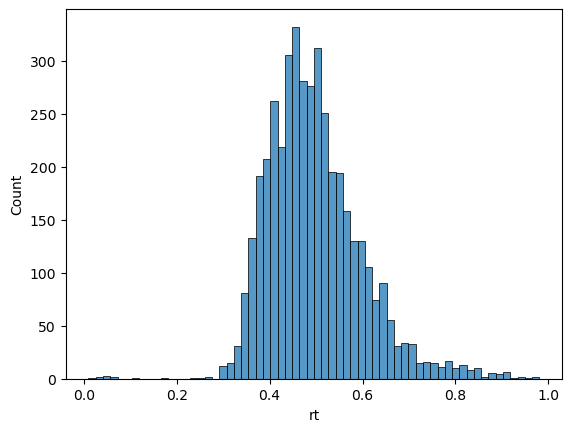

In [14]:
sns.histplot(df['rt'])

Note that identifying the shape of the distribution can also help you identify outliers

What kind of distribution does this look like? 

#### Few common distributions
![descriptive](images/distributions_illustration.png)

* A uniform distribution is one where the distribution of values is constant over the range of the variable 
* A bimodal distribution is a distribution that has two distinct modes or peaks
* A bell-shaped distribution, also called the Gaussian or Normal distribution has the following characteristics 
    - has the shape of a bell
    - most of the data points cluster around the mean 
    - as you move away from the mean in either direction, the frequent of data points gradually decreases
    - the data are symmetric around the middle
* Skewed distributions are asymmetric distributions with more values towards one end of the range than the other
* A random distribution is when there is no apparent pattern in the distribution

#### Descriptive statistics by groups

Now we can get some descriptive statistics for RT in each condition. We do this using pandas `.groupby()` method to group by flanker condition, and then we select the `rt` column for further processing by putting it in square brackets (which is pandas' way of selecting columns). Finally we chain all this with the `.describe()` method
```python
df.groupby('flankers')['rt'].describe()
```

In [15]:
df.groupby('flankers')['rt'].describe()

,count,mean,std,min,25%,50%,75%,max
flankers,,,,,,,,
congruent,1076.0,0.470568,0.098868,0.009837,0.401727,0.449814,0.521514,0.953989
incongruent,1064.0,0.515996,0.107581,0.061839,0.449544,0.504629,0.573016,0.965726
neutral,2149.0,0.498310,0.098934,0.031539,0.433521,0.485642,0.552863,0.980535


Note the `count` (total number of data points), standard deviation (`std`) as well as the `min` and `max` values for each condition.

Descriptive statistics are informative but they are often not enough, you shouldn’t rely solely on these statistics but should also visualize your data. 
This is best illustrated through Anscombe's Quartet
![anscombe](images/anscombe_quartet.png)

## Visualizations

### Box plot

Let's look at a box plot of values in each condition:
```python
sns.catplot(kind='box',
           data=df,
           x='flankers', y='rt')
```

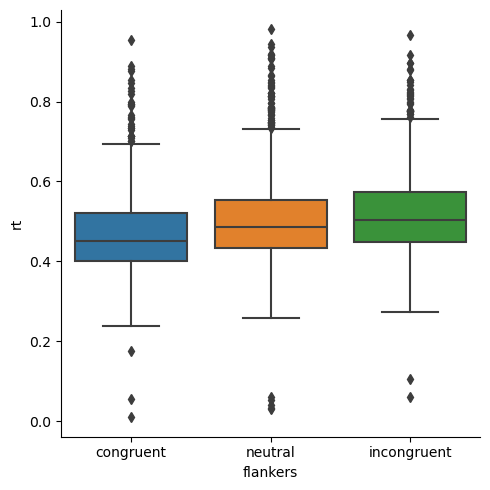

In [16]:
sns.catplot(kind='box',
           data=df,
           x='flankers', y='rt')

The data show the skew that is expected of RT data — there are fundamental human performance limits on how fast a person can respond (short RTs), but the upper limit of RTs is theoretically unlimited. In the present experiment, participants actually only had a 1 s window in which to respond, so the RTs are all less than 1. Nevertheless, the data are skewed because there is a wider range of RTs above the median than below.

Another thing we can see about the distribution of values is that there are many outliers (individual points in the box plot) at the long end of the RT range, but few at the short end. This is, again, a consequence of the skewed nature of the data. However, notably some of the outliers on the short end of the distributions are suspicious: human RTs in very simple tasks (like pressing a button any time a light comes on) are rarely shorter than 200 ms, yet we have a few RT values below that. So our box plots suggest that we may have some anomalous data, perhaps from trials on which someone pressed a button accidentally prior to processing the actual direction of the arrow.

Finally, the box plots suggest that RTs are slowest in the incongruent condition and fastest in the congruent condition — consistent with our predictions based on past studies of the flanker effect. RTs for the neutral condition are in between the other two conditions. This suggests that perhaps both facilitation effects in the congruent condition, and interference effects in the incongruent condition, are present in the data. However, it's hard to know how large or believable those differences are, because the distributions overlap quite a bit between the three conditions.

### Strip plot
A strip plot is a single-axis scatter plot that is used to visualise the distribution of many individual one-dimensional values. 

Next let's look at a strip plot of the data, which plots each data point separately:
```python
sns.catplot(kind='strip',
           data=df,
           x='flankers', y='rt')
```

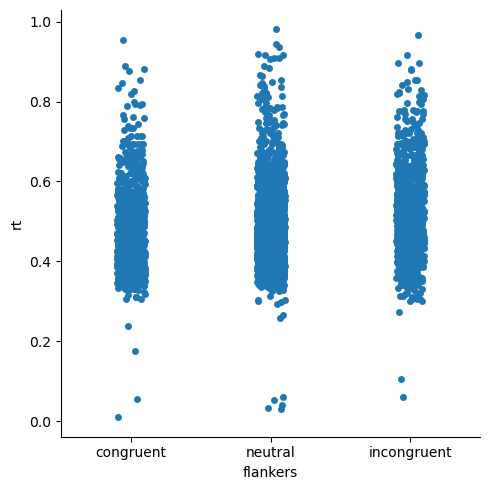

In [17]:
sns.catplot(kind='strip',
           data=df,
           x='flankers', y='rt')

This is really less informative than the above plots, because there are so many data points! Mostly we just see big patches of the plots for each condition with lots of individual values. 

However, the strip plots do show us something interesting that wasn't evident in the previous plots: the very fast outlier data points are quite anomalous, even compared to the very slow outliers. That is, there are few "fast" data points, and they are generally quite far from the rest of the distribution of RTs. In contrast, the slower data points are more plentiful, and seem to form a rather continuous set of values, albeit more sparse than the points closer to the centres of the distributions. This suggests that the slower data points might be quite believable as real data — mosly people make faster responses, but sometimes they're a bit slower. In contrast, the strip plot gives us greater confidence that the very fast RTs should be eliminated from analysis, because they are not just slightly-faster responses than the next-fastest responses.

### Point plot
Finally, let's look at a point plot. 

Point plots show the mean for each condition, along with 95% confidence intervals (CIs) as the measure of variance. CIs are much narrower than the whiskers in box plots, because they are meant to represent our confidence in the estimate of the mean, rather than showing the overall distribution of values. In general, we can interpret conditions with non-overlapping 95% CIs as being "believably different" from each other, and likely to be statistically significantly different as well.
```python
sns.catplot(kind='point', 
           data=df,
           x='flankers', y='rt', hue='flankers')
```


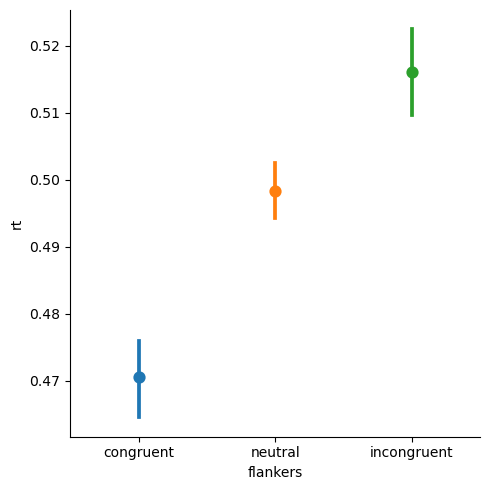

In [18]:
sns.catplot(kind='point', 
           data=df,
           x='flankers', y='rt', hue='flankers')

## Examine individual participant data
Now, let's use split-apply-combine to average the RTs within each individual participant (and within each condition within individuals) prior to the group-level descriptive statistics. We can do this in one line of code by chaining, combining the following steps:
- group by both participant ID and condition (split). Note that the argument to `.groupby()` is a list containing the two columns we want to group by
- compute the mean for each condition within each participant (apply)
- group by condition only (combining across participants)
- use `.describe()` to apply another computation (average across participants) and combine the output into a new table

```python 
df.groupby(['participant', 'flankers'])['rt'].describe()
```

In [19]:
df.groupby(['participant', 'flankers'])['rt'].describe()

count      mean       std       min       25%  \
participant flankers                                                     
s1          congruent     39.0  0.455259  0.062264  0.345359  0.405289   
            incongruent   40.0  0.471838  0.076799  0.373203  0.422353   
            neutral       80.0  0.476104  0.071508  0.357297  0.429230   
s10         congruent     40.0  0.471231  0.078493  0.329720  0.403671   
            incongruent   40.0  0.499031  0.068776  0.301630  0.467616   
...                        ...       ...       ...       ...       ...   
s8          incongruent   40.0  0.494878  0.133459  0.061839  0.453581   
            neutral       80.0  0.460459  0.123738  0.031539  0.412689   
s9          congruent     40.0  0.431829  0.074206  0.316626  0.382794   
            incongruent   39.0  0.437926  0.083530  0.301302  0.381454   
            neutral       80.0  0.432177  0.061369  0.304624  0.389656   

                              50%       75%       max  
participant flankers                                   
s1          congruent    0.445225  0.495277  0.597253  
            incongruent  0.463064  0.506307  0.777096  
            neutral      0.467111  0.514231  0.783683  
s10         congruent    0.463479  0.521448  0.689298  
            incongruent  0.499406  0.553274  0.637271  
...                           ...       ...       ...  
s8          incongruent  0.501628  0.541888  0.881690  
            neutral      0.478907  0.525675  0.644778  
s9          congruent    0.413070  0.468954  0.646603  
            incongruent  0.421338  0.487607  0.705617  
            neutral      0.431551  0.462674  0.609026  

[81 rows x 8 columns]

This is a lot of numbers to look at! Indeed, so may that pandas doesn’t show us all the rows. From what is shown, we can see that there is certainly variance in mean RTs for each individual, and in variance (as measured by standard deviation), but it’s hard to get a real sense of how much variability there is, or whether there are any participants whose data may be anomalous relative to most others.

### Visualizing nested data with Seaborn

Seaborn makes it easy to separate data by participants in visualization. For example, we can generate box plots as we did above, but put participant on the *x* axis, and use the `hue` kwarg to colour-code flanker condition. Because there are lots of individual participants, we add the `aspect=3` kwarg to tell Seaborn to make the plot 3x as wide as it is tall.
```python
sns.catplot(kind='box',
           data=df,
           x='participant', y='rt', hue='flankers',
           aspect=3
           )
```

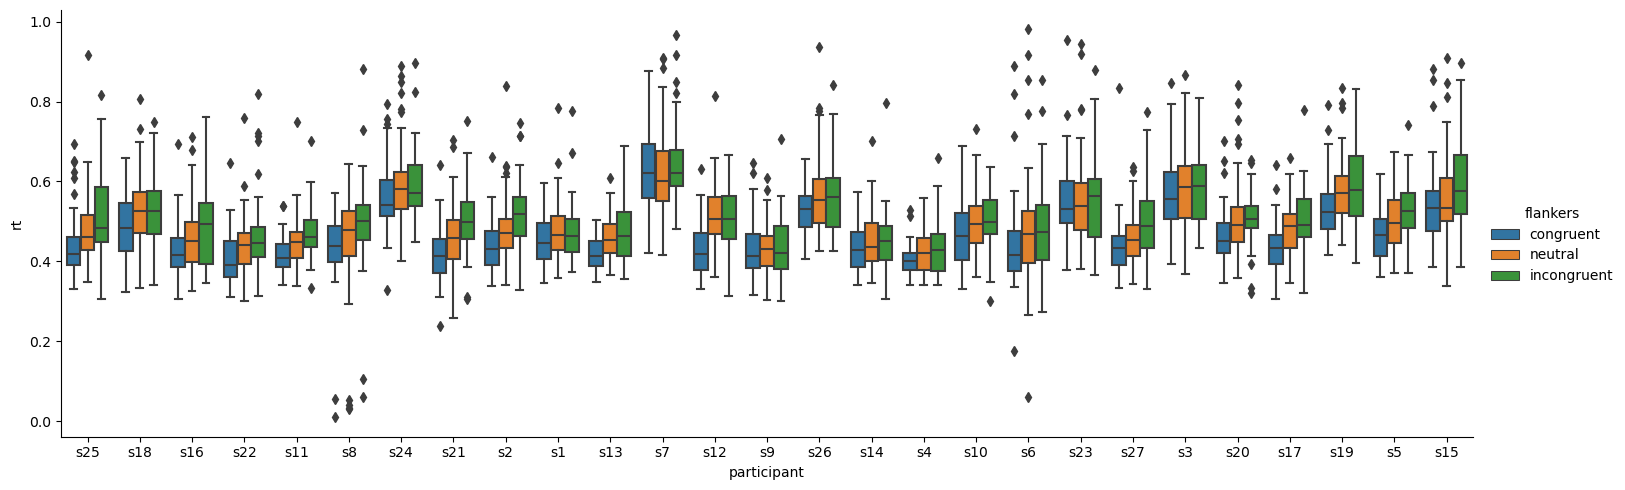

In [20]:
sns.catplot(kind='box',
           data=df,
           x='participant', y='rt', hue='flankers',
           aspect=3
           )

Another way to visualize so many different box plots is with Seaborn's `col` and `col_wrap` kwargs. On its own, `col=` will plot whatever variable you give it in separate columns — in our case, participants (rather than as different locations on the *x* axis, as shown above). Adding the `col_wrap` kwarg is necessary when the number of categories passed to `col` is large, as in our 27 participants. This kwarg tells Seaborn how many columns to put on one row before wrapping around to a new row. 

One last trick we will use is to set Seaborn's context to `talk`, to make the font size easier to read when we have so many plots. We'll set it back to `paper` after showing the plot, so our future plots aren't affected.
```
sns.set_context('talk')
sns.catplot(kind='box',
           data=df,
           x='flankers', y='rt', col='participant', col_wrap=6,
           )
sns.set_context('paper')
```

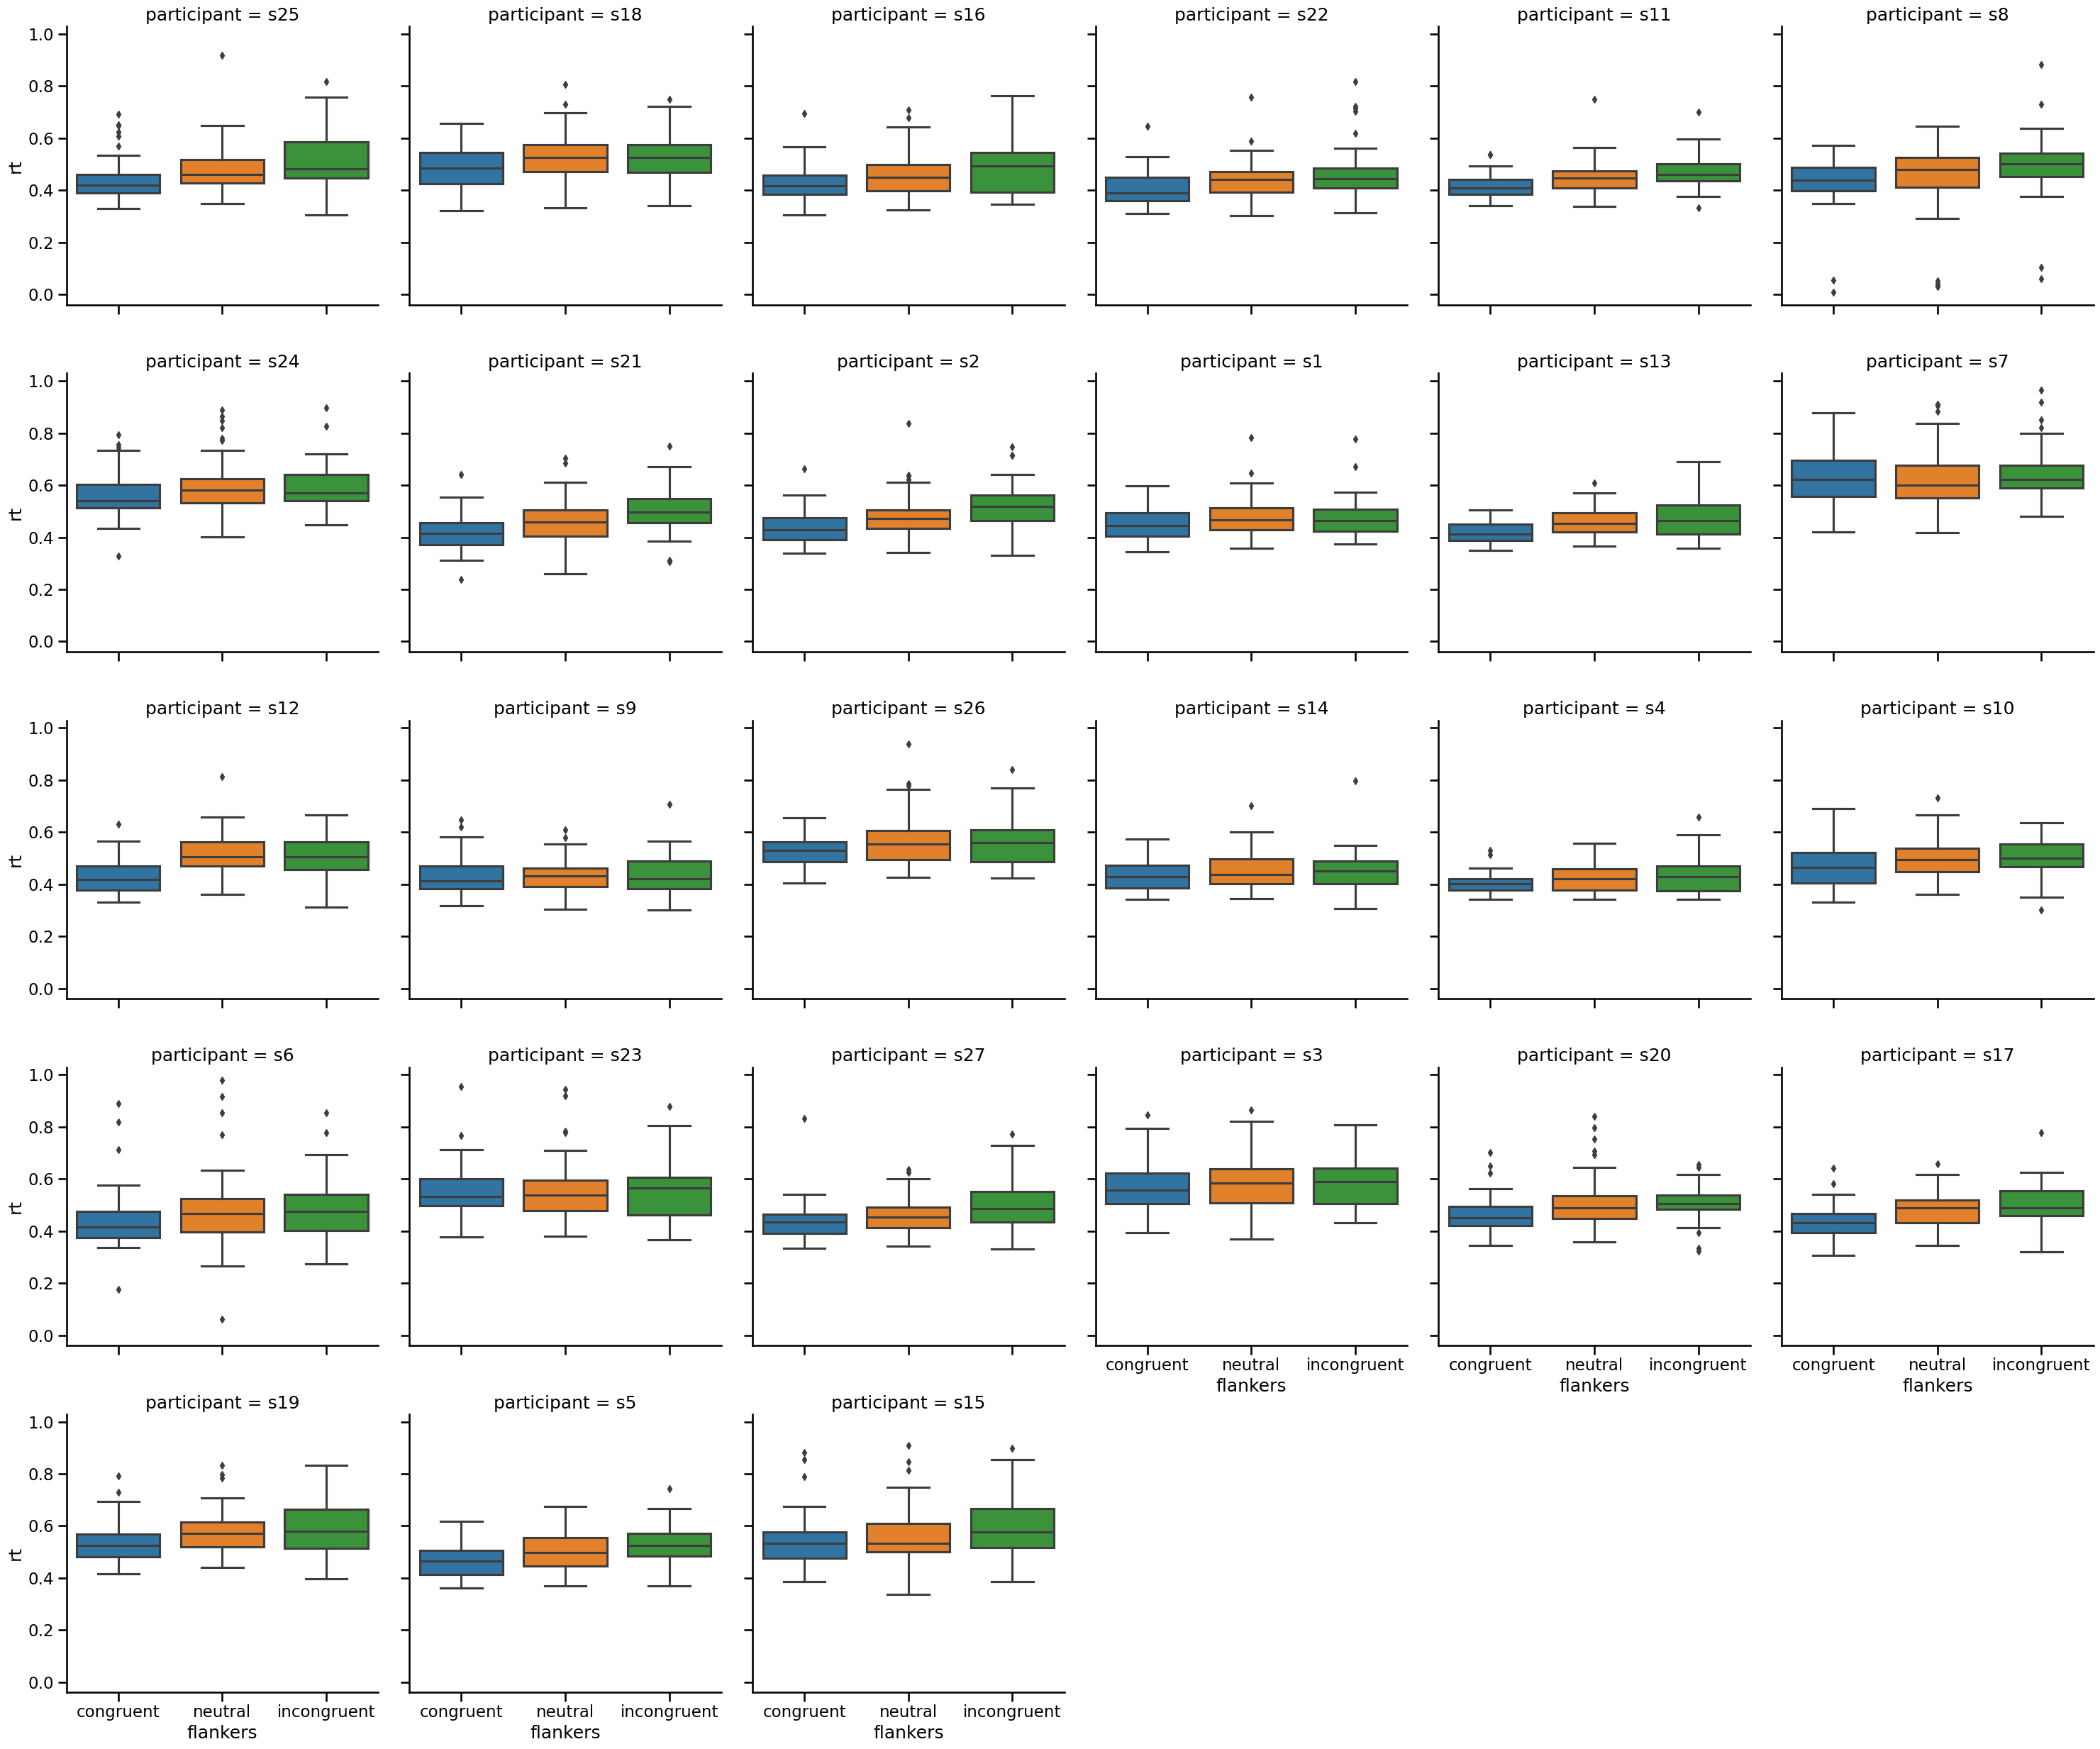

In [21]:
sns.set_context('talk')
sns.catplot(kind='box',
           data=df,
           x='flankers', y='rt', col='participant', col_wrap=6,
           )
sns.set_context('paper')

This plot shows us that, indeed, there is variability among participants in both the median RTs and the variance (as indicated by the length of the whiskers, and the number and range of outlier points). Encouragingly, however, each individual seems to show the expected effect, of longer RTs for incongruent than congruent flankers. It also shows us that those anomalously fast RTs we saw above are contributed only by a couple of participants, again leading us to think that these are not believable data points.

Next we'll generate a strip plot, in which we colour-code the points according to which participant they are from:

```python
sns.catplot(kind='strip',
           data=df,
           x='flankers', y='rt', hue='participant')
plt.show()
```

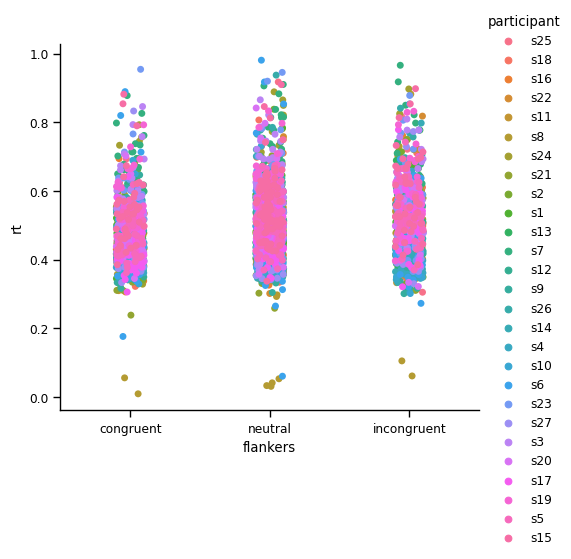

In [22]:
sns.catplot(kind='strip',
           data=df,
           x='flankers', y='rt', hue='participant')
plt.show()

This is not a lot more useful than the strip plot above, because Seaborn draws dots for each participant over those of previous participants. So we see lots of pink in the plot above, because that is the colour used for the last participant plotted. 

## Appropriately dealing with repeated measures: Aggregating data by participants

Because there are so many data points, and variation in both the mean and range of values between participants, it is necessary to first average (**aggregate**) within each participant and condition, prior to computing descriptive statistics or visualizing. This ensures that the variance we are examining is the **between-subjects variance**, unconfounded with **within-subjects variance**. This is primarily important in generating plots that show confidence intervals (CIs), such as point plots and bar plots, for reasons explained below.

Seaborn has a way of doing this "on the fly" when you generate plots, using the `units=` kwarg and passing the name of the grouping variable for repeated measures (in this case, `participant`):

```python
sns.catplot(kind='point', join=False,
           data=df, units='participant',
           x='flankers', y='rt', hue='flankers')
plt.show()
```

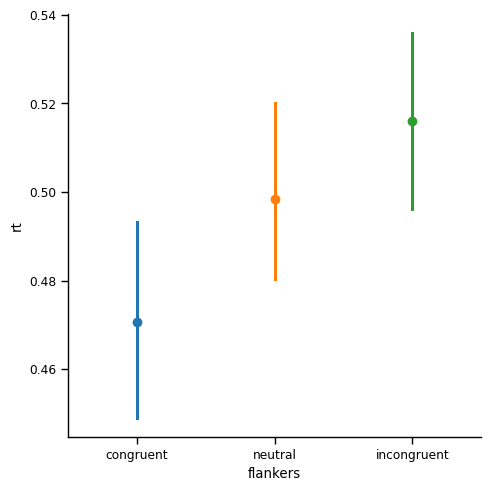

In [23]:
sns.catplot(kind='point', join=False,
           data=df, units='participant',
           x='flankers', y='rt', hue='flankers')
plt.show()

**This is the most important figure in this lesson**. Compared to the point plot with 95% CIs that we generated above for the aggregated data, the CIs in this plot are much larger than those we saw earlier, in the point plot for the un-aggregated data. In that previous plot, the width of the CIs was only about 0.005 s (5 ms). Here, with the CIs computed properly (as reflecting the variance across individuals), the width of the CIs is approximately 0.02 s (20 ms). While still small relative to the differences in the means, the CIs are nonetheless roughly 4x wider in the aggregated data. 

### Why do CIs get larger when we properly aggregate repeated measures data?

We'll see below that the variance in the data actually goes down when we average within participants, as quantified by the min-max range of values, and the standard deviation. So it may seem strange that the CIs do the opposite, and get bigger. To understand this, consider how the 95% CIs are computed:

$CI = 1.96 * \frac{std}{\sqrt n}$ 

CIs are computed by dividing the standard deviation ($std$) by the square root of $n$ — the number of data points used to compute the mean and standard deviation. In the un-aggregated data, this was approximately 1000 – 2000 data points for each condition. In contrast, for the aggregated data, $n$ = 27. Thus the CIs are much wider, because dividing by a larger number (1000 - 2000, rather than 27) results in a smaller number (even factoring in the differences in standard deviation, and the square root calculation). The values are multiplied by 1.96 because this is the *z* value corresponding to *p* = .05 in a normal distribution.

Notably, the conclusions that we would draw from this final plot would be quite different from if we had, in error, used the first point plot generated from the un-aggregated data. The first plot made it look like RTs in the three conditions were very different from each other, with little question as to the differences between them (due to the small and non-overlapping CIs). In contrast, when the data are properly aggregated as in the above plot, the CIs for neutral overlap a lot with both of the flanker conditions, which makes us less confident in their differences. 


Recall that the neutral condition was intended to help assess whether the congruent flankers showed facilitation relative to neutral, and whether incongruent flankers showed interference relative to neutral. The fact that the neutral condition overlaps with both others, but congruent and incongruent appear significantly different, suggests that the flanker effect (congruent faster than incongruent) may actually be due to a *combination* of facilitation and interference, rather than one or the other. 

The interpretation of the current data set is less important here than understanding the importance of recognizing and appropriately dealing with repeated-measures data. It is critical to understand the effects of repeated measures and nesting on estimate of variance — and of the differences between measures of variance in the data (as reflected by things like standard deviation, or box plots), and estimates of our confidence in the accuracy of the mean (CIs). CIs can be used for statistical inference (i.e., is there a believable difference?), whereas the variance reflected in box plots (and histograms etc.) is more informative at the early stages of exploring and understanding your data, and diagnosing potential issues in the data that might need to be addressed prior to inference about the true patterns in the data. 

## Aggregating using Split-Apply-Combine

While it's nice that Seaborn can aggregate repeated-measures data for us, that only works for generating Seaborn plots. It's also good to know how to create a DataFrame of aggregated data, which you can then use to generate tables of descriptive statistics, and eventually perform statistical tests on.

To do this, we will use *two* split-apply-combine operations in sequence. In one chained command, we will:
- split the data by participant and condition: `.groupby(['participant', 'flankers'])`
- select the `rt` column: `['rt']`
- apply a calculation to get mean RT for each participant/condition: `.mean()`
- split these results by condition only, to combine across participants: `.groupby('flankers')`
- apply descriptive statistics and combine the results in a table: `.describe()`

In [28]:
df.groupby(['participant', 'flankers'])['rt'].mean().groupby('flankers').describe()

,count,mean,std,min,25%,50%,75%,max
flankers,,,,,,,,
congruent,27.0,0.470883,0.060013,0.401993,0.430794,0.446840,0.508700,0.628185
incongruent,27.0,0.516718,0.052936,0.428867,0.484333,0.506722,0.542447,0.650769
neutral,27.0,0.498696,0.053444,0.422821,0.458468,0.480008,0.537580,0.619004


Compare the `count`, `std`, `min`, and `max` values here to that in our first descriptive statistics table above, which we'll reproduce here for ease of comparison
```python
df.groupby('flankers')['rt'].describe()
```

In [29]:
df.groupby('flankers')['rt'].describe()

,count,mean,std,min,25%,50%,75%,max
flankers,,,,,,,,
congruent,1076.0,0.470568,0.098868,0.009837,0.401727,0.449814,0.521514,0.953989
incongruent,1064.0,0.515996,0.107581,0.061839,0.449544,0.504629,0.573016,0.965726
neutral,2149.0,0.498310,0.098934,0.031539,0.433521,0.485642,0.552863,0.980535




You can see that the number of data points goes down from the total number of trials across all participants (~4200) to 27 per condition (the number of participants). The mean RTs do not actually change at all. This is expected because averaging is a linear operation, meaning that the average across all trials is the same as averaging first within participants then across trials.

However, the range of values decreases when we look at the min and max values. This is a normal consequence of averaging — the most extreme values found in a set of individual data points will be reduced when we average by some grouping variables (like participant).

The variance (as reflected by the standard deviation, std) gets smaller as well, for a similar reason: the variance is now among the average RTs for each participant in each condition, which have a smaller range than the raw data points.


### Plot data aggregated across trials

Now let's re-plot the data using the same plots we did above, but now for the data averaged within participants. 

First let's save the aggregated data in a new DataFrame called `df_avg`. We chain the `.reset_index()` method to the end of this, because `.groupby()` sets the indexes of the DataFrame to be the grouping variables (in this case, `rt` and `flankers()`). This is ideal for looking at tables of the data (e.g., in the above, RT and condition are in bold), but index columns are not visible to Seaborn as data columns for plotting. So we use `.reset_index()` to convert `rt` and `flankers` back from indexes to regular DataFrame columns.

```python
df_avg = pd.DataFrame(df.groupby(['participant', 'flankers'])['rt'].mean()).reset_index()
```

Now let's generate a box plot of these data:
```python
sns.catplot(kind='box',
           data=df_avg,
           x='flankers', y='rt')
```

Another, somewhat confusing, thing is that the order of the conditions on the *x* axis is reversed: whereas before the order was congruent- neutral - incongruent, now neutral is last. This is a consequence of the `.reset_index()` method, which led to the conditions being re-ordered alphabetically. This highlights that its always good to pay close attention to your plot labels!

Seaborn actually has an easy way to specify the order of values on a categorical axis, if you want to: using the `order=` kwarg, and passing a list of conditions in the order you want them to appear:

```python
sns.catplot(kind='box',
           data=df_avg,
           x='flankers', y='rt',
           order=['congruent', 'neutral', 'incongruent'])
```

### Strip plot
A strip plot of the data now much easier to make sense of, because we only have one point per participant in each condition

```python
sns.catplot(kind='strip',
           data=df_avg,
           x='flankers', y='rt', hue='participant')
```

### Line plot
This makes it easier to get a sense of the variability between individuals. However, It's a bit hard to see how each individual's RT changes between the two experimental conditions. To facilitate this, let's use a point plot, which by default draws lines to join data from each individual:

```python
sns.catplot(kind='point',
           data=df_avg,
           x='flankers', y='rt', hue='participant',
           order=['congruent', 'neutral', 'incongruent'])
```

You may recall that point plots typically show means and 95% CIs, but the plot above lacks CIs. This is because in the `df_avg` DataFrame, there is only one value for each participant in each condition (because we averaged across trials). If we wanted to see CIs for each individual, we could use the un-aggregated data (`df`).
```python
sns.catplot(kind='point',
           data=df,
           x='flankers', y='rt', hue='participant',
           order=['congruent', 'neutral', 'incongruent'])
```

## Point plots aggregated across participants

The CIs in the above plot don't, however, help us to make a simple inference as to whether, across all participants, there is a significant RT difference between congruent and incongruent. The data are certainly suggestive of this, because all participants show slower RTs for incongruent. But this is where a point plot with 95% CIs, across participants, is useful:

```python 
sns.catplot(kind='point', join=False,
           data=df_avg,
           x='flankers', y='rt', hue='flankers',
           order=['congruent', 'neutral', 'incongruent'])
```

### Things to remember about repeated measures
- Repeated measures occur when we take repeated samples of the same measurement. This is common in cognitive psychology and neuroscience data, because individual measurements typically include noise. Averaging across repeated measurements yields a more robust estimate of the true value for that individual
- When we have repeated measures data, we need to be concerned about the difference between within-subjects variance, and between-subjects variance
- Within-subjects variance is the variation within an individual, across the repeated measurements we take
- Between-subjects variance is the variation between individuals, in the *average* response across the repeated measures taken from that individual
- If we simply average across all trials and participants, our measures of variance will be inaccurate, because we are conflating within- and between-subjects variance
- Conflating within-and between-subjects variance will lead to incorrect conclusions, particularly because confidence intervals and statistical tests consider the number of samples in their computations. When assessing effects across a group of participants, the number of participants is the appropriate number of samples to use. The much larger number of samples that comes from summing the number of individual trials across all participants will artificially inflate estimates of the significance of experimental effects
- The proper way to work with repeated measures data is to first average across all trials for each experimental condition, within an individual. We call this *aggregation*
- After we have properly aggregated the data within each individual, then we can average across participants and accurately estimate the between-subjects variance
- Between-subject variance is typically what is important in assessing the significance of experimental manipulations
- Proper aggregation of repeated measures data is easy using the pandas `.groupby()` method

## Outlier Identification and Removal

**Outliers** are data points that are "significantly different" from the majority of data points in a data set. "Significantly different" is in quotes here, because this does not necessarily mean we use statistical testing to define outliers, and also that there are several different definitions of "significant" that cam be used to identify outliers.

### Tukey's method
[John Tukey](https://en.wikipedia.org/wiki/John_Tukey), [who was a driving force in the development of exploratory data analysis](https://scholar.google.com/scholar_lookup?&journal=Exploratory+Data+Analysis&author=Tukey+J.+W.&publication_year=1977&volume=Vol.%202), defined outliers as points more than $1.5 x IQR$. Recall that IQR is the *inter-quartile range*, which captures 50% of the data points in a data set. In a box plot (which Tukey invented), the IQR is the "box", and 1.5 IQR are the extent of the "whiskers" in each direction from the median. We noted earlier that in box plots, outliers are represented as individual points in the plot, beyond the whiskers. Since Tukey invented box plots and this definition of outliers, it's not surprising that they are identical. In general, outliers defined in this way will comprise approximately 1% of the data, if the data are approximately normally distributed.

![](images/boxplot_vs_pdf.png)

*Image from [Jhguch](https://en.wikipedia.org/wiki/User:Jhguch) and shared under the  [Creative Commons Attribution-Share Alike 2.5 Generic](https://creativecommons.org/licenses/by-sa/2.5/deed.en) license, via Wikimedia Commons*

### Standard scores

An alternative method is to use standard scores. This is done by applying the ***z* transform** to the data. This transform's formula is:

$$z = {(x - \mu) \over \sigma} $$

Where $x$ is an individual data point, $\mu$ is the mean of the data set, and $\sigma$ is the standard deviation. In other words, the *z* transform takes a data set and transforms it so that its mean is zero (by subtracting the mean from every value), and its standard deviation is 1. 

Put another way, after we apply a *z* transform to a data set, the numerical values in the data set are not in their original units (be that milliseconds, or dollars, or whatever) but in units of standard deviations. So in a *z* transformed data set, a data point with a value of 1 would have had an original value that was 1 standard deviation from the mean. This is where the "standard" in "standard scores" comes from.

Applying a *z* transform is also called *normalizing* the data set, because the *z* transform assumes that the data come from a normal distribution (also known as a Gaussian distribution, or the *bell curve*). The nice thing about standardizing a data set is that the values have fairly straightforward interpretations. In a normal distribution:
- 68.27% of all values fall within ±1 standard deviation of the mean ($1 \sigma$),
- 95.45% of all values fall within ±2 standard deviations of the mean ($2 \sigma$), and
- 99.73% of all values fall within ±3 standard deviations of the mean ($3 \sigma$)

<img alt="M. W. Toews, CC BY 2.5 &lt;https://creativecommons.org/licenses/by/2.5&gt;, via Wikimedia Commons" src="./images/standard_deviation_diagram.svg" width=500>

*Image from M. W. Toews, and shared under the  [Creative Commons Attribution-Share Alike 2.5 Generic](https://creativecommons.org/licenses/by-sa/2.5/deed.en) license, via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Standard_deviation_diagram_micro.svg)*

This means that if we define outliers as those values *z* > 3 or *z* < -3, then we will tend to reject about 0.25% of a data set. Sometimes, *z* ±2.5 $\sigma$ is used instead. This will tend to reject more data points (typically around 2%). 

### Idenfity outliers in a DataFrame

To define values based on the IQR, we first need to calculate the IQR. pandas doesn't have a method for this specifically, but we can use the pandas `.quantile()` method with the argument 0.25 to reference the lower end of the IQR (the 0.25 quantile means the point below which 25% of data values lie), and 0.75 for the upper end of the IQR. Since IQR is defined as the range between the 25th and 75th quantiles, we can compute it by subtracting the difference between the two:

~~~python
q1 = df['rt'].quantile(0.25)
q3 = df['rt'].quantile(0.75)
iqr = q3 - q1
~~~



The variable `iqr` represents the size of the box in the box plot of the data. Recall that our definition of outliers is 1.5 x IQR — the length of the whiskers in the box plot. 

We can now define the threshold for values we well call "outliers" (i.e., the length of the whiskers) based on `iqr`:

~~~python
out_low = q1 - 1.5 * iqr
out_high = q3 + 1.5 * iqr
~~~

So `out_low` (the end of the bottom whisker) is 1.5 x IQR below q1 (the lower end of the box), and likewise for `out_high`. 

Recall from the pandas lesson that we can select values in a DataFrame using a Boolean mask. We can do that here to identify the rows of the DataFrame where the RT values are lower than 1.5 x IQR:

~~~python
df.loc[:, 'rt'] < out_low
~~~

The result will have values of `True` for those data points that are "low" outliers, and `False` for all other data points. We can count the number of these by passing the mask to `np.sum()` (since `True` = `1` and `False` = `0`)

~~~python
np.sum(df.loc[:, 'rt'] < out_low)
~~~

We can do the same to identify outliers at the high end of the range of values, using the `>` operator this time:

~~~python
np.sum(df.loc[:, 'rt'] > out_high)
~~~

Consistent with what we saw in the box plot, there are more outliers at the high (slow RT) end of the distribution than at the low (fast RT) end. 

#### Marking data points as outliers

Now let's make a column in `df` called `outliers_tukey` that is a Boolean mask: values of `True` in rows with outlier RT values, and `False` for all other rows. 

To do this, we want to combine the two masking operations above `< out_low` and `> out_high`. We can do that using the OR `|` operator, as long as we include each of our masking operations in parentheses (this last bit is important, but easy to forget!):

~~~python

(df.loc[:, 'rt'] < out_low) | (df.loc[:, 'rt'] > out_high)
~~~

It's a bit hard to confirm that this works from the output above, but if we pass that whole expression to `np.sum()` we can see that the number of all `True` values is the same as the total of the `out_low` and `out_high` values reported above:

~~~python
np.sum((df.loc[:, 'rt'] < out_low) | (df.loc[:, 'rt'] > out_high))
~~~

To actually use this expression to create a new column, we just have to assign the result to a new column name in `df`:

~~~python
df['outliers_tukey'] = (df.loc[:, 'rt'] < out_low) | (df.loc[:, 'rt'] > out_high)
df.head()
~~~

And double-check the number, using the pandas `.sum()` method:

~~~python
df['outliers_tukey'].sum()
~~~

### Standard scores (*z* transform)

We can convert scores to standard scores very easily, using the `zscore()` function in `scipy.stats`:

~~~python
from scipy import stats

df['rt_z'] = stats.zscore(df['rt'])
df.head()
~~~

Now we can identify outliers as those rows where `rt_z > 2.5` or `rt_z < -2.5`. We'll define a variable `z_thresh` because that way we can later change it to a different value (like 3) if we desire.
~~~python
z_thresh = 2.5
(df['rt_z'] > z_thresh) | (df['rt_z'] < z_thresh)

~~~

More simply, we can take the absolute value of *z* (which ignores the `-` sign):
~~~python
np.abs(df['rt_z']) > z_thresh
~~~

The number of outliers identified this way is:

~~~python
np.sum(np.abs(df['rt_z']) > z_thresh)

~~~

#### Write column of standard score outliers
Now we will add a column marking outliers as defined this way, similarly to what we did above for the Tukey method:

~~~python
df['outliers_z'] = np.abs(df['rt_z']) > 3
df.head()
~~~

### About this notebook

A lot of the content here is directly adapted from Wallisch'sNeural Data Science Educational Materials (https://github.com/neural-data-science)